In [1]:
import numpy as np

import wf_psf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns


In [2]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

In [3]:
metrics_file = '../wf-outputs/metrics/metrics-poly_interp_{}bins_sigma_{}.npy'

saving_folder ='../figures/'

In [8]:
n_bins_list = ['8', '16_', '32_']
sigma_vals = [0, 0.005, 0.01, 0.02]
sigma_list = ['0', '005', '01', '02']

metrics_dict_list_8 = [np.load(metrics_file.format(n_bins_list[0], sigma), allow_pickle=True)[()] for sigma in sigma_list]
metrics_dict_list_16 = [np.load(metrics_file.format(n_bins_list[1], sigma), allow_pickle=True)[()] for sigma in sigma_list]
metrics_dict_list_32 = [np.load(metrics_file.format(n_bins_list[2], sigma), allow_pickle=True)[()] for sigma in sigma_list]



In [ ]:
polyc_rmse, polyc_std_rmse, polyc_rel_rmse, polyc_std_rel_rmse = wf_psf.script_utils.extract_poly_results(metrics_dict_list)

In [ ]:
e1, e2, R2 = wf_psf.script_utils.extract_shape_results(metrics_dict_list)

In [13]:
pix_rmse8, pix_std_rmse8, pix_rel_rmse8, pix_std_rel_rmse8 = wf_psf.script_utils.extract_shape_pix_results(metrics_dict_list_8)
pix_rmse16, pix_std_rmse16, pix_rel_rmse16, pix_std_rel_rmse16 = wf_psf.script_utils.extract_shape_pix_results(metrics_dict_list_16)
pix_rmse32, pix_std_rmse32, pix_rel_rmse32, pix_std_rel_rmse32 = wf_psf.script_utils.extract_shape_pix_results(metrics_dict_list_32)





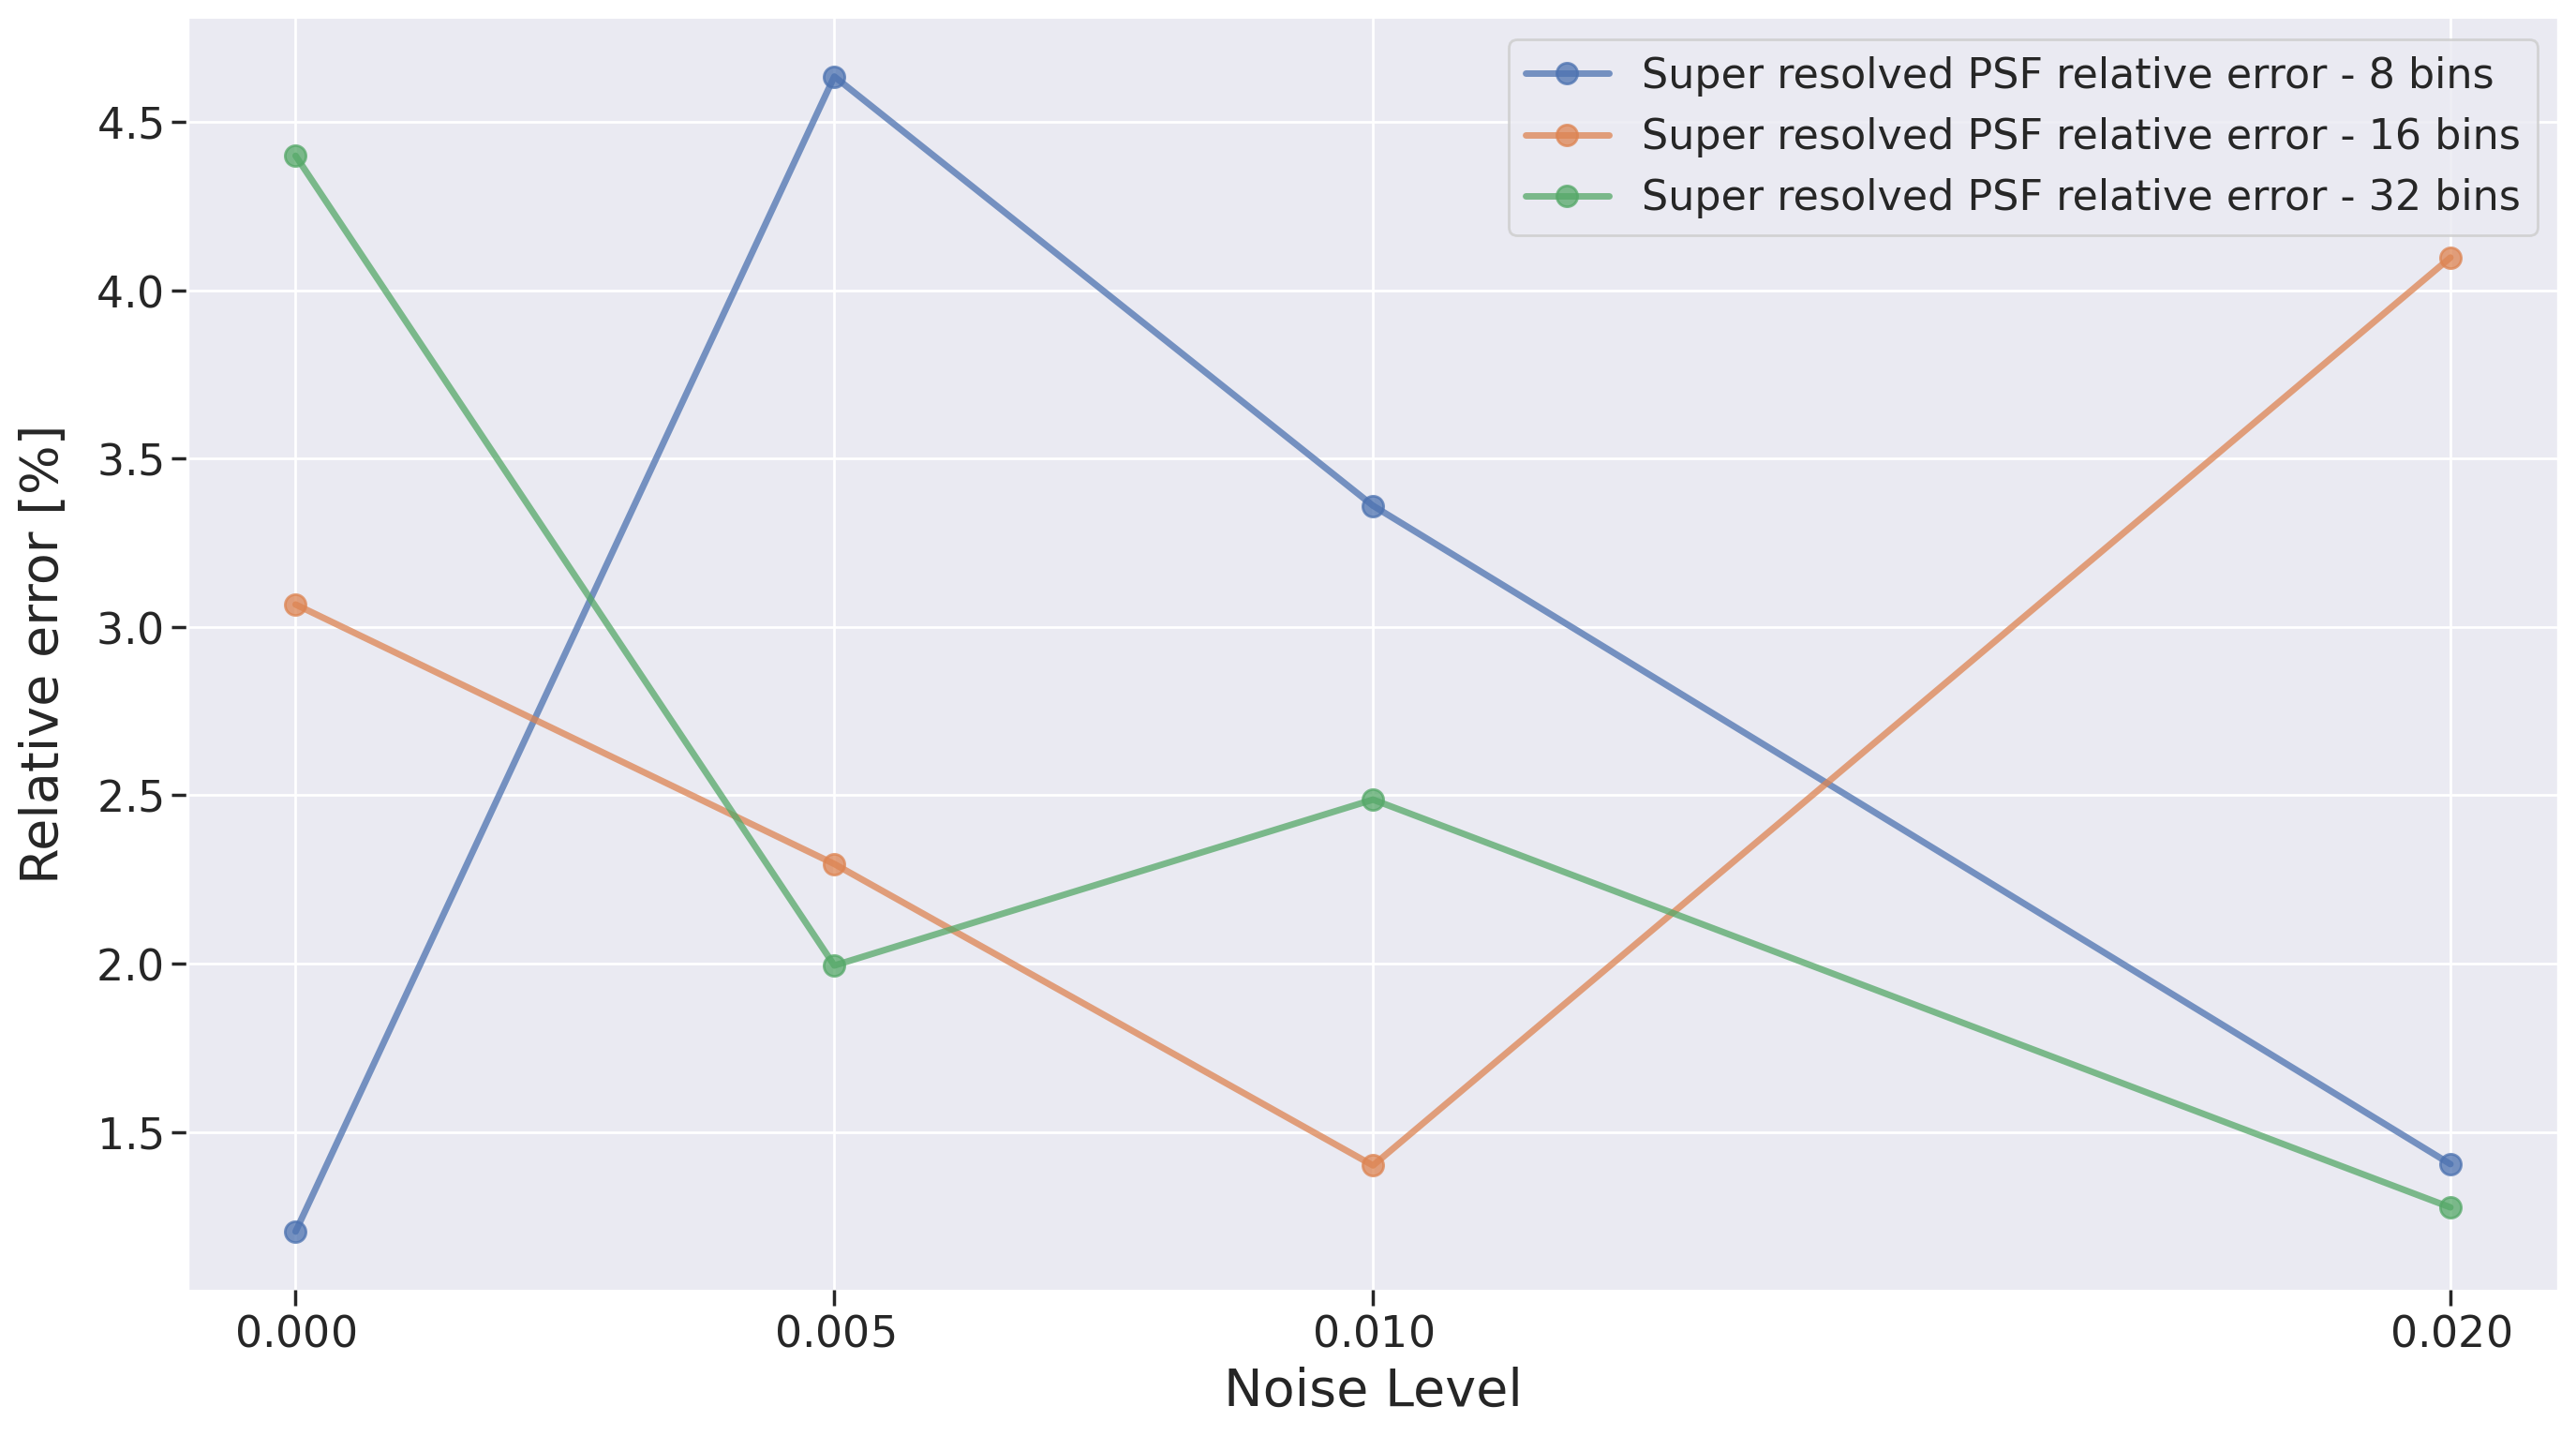

In [27]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse8, label='Super resolved PSF relative error - 8 bins', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse16, label='Super resolved PSF relative error - 16 bins', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse32, label='Super resolved PSF relative error - 32 bins', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(sigma_vals)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Noise Level', fontsize = 20)


#plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars.pdf')
plt.show()

In [28]:
euclid_rmse8, euclid_std_rmse8, euclid_rel_rmse8, euclid_std_rel_rmse8 = wf_psf.script_utils.extract_poly_results(metrics_dict_list_8)
euclid_rmse16, euclid_std_rmse16, euclid_rel_rmse16, euclid_std_rel_rmse16 = wf_psf.script_utils.extract_poly_results(metrics_dict_list_16)
euclid_rmse32, euclid_std_rmse32, euclid_rel_rmse32, euclid_std_rel_rmse32 = wf_psf.script_utils.extract_poly_results(metrics_dict_list_32)



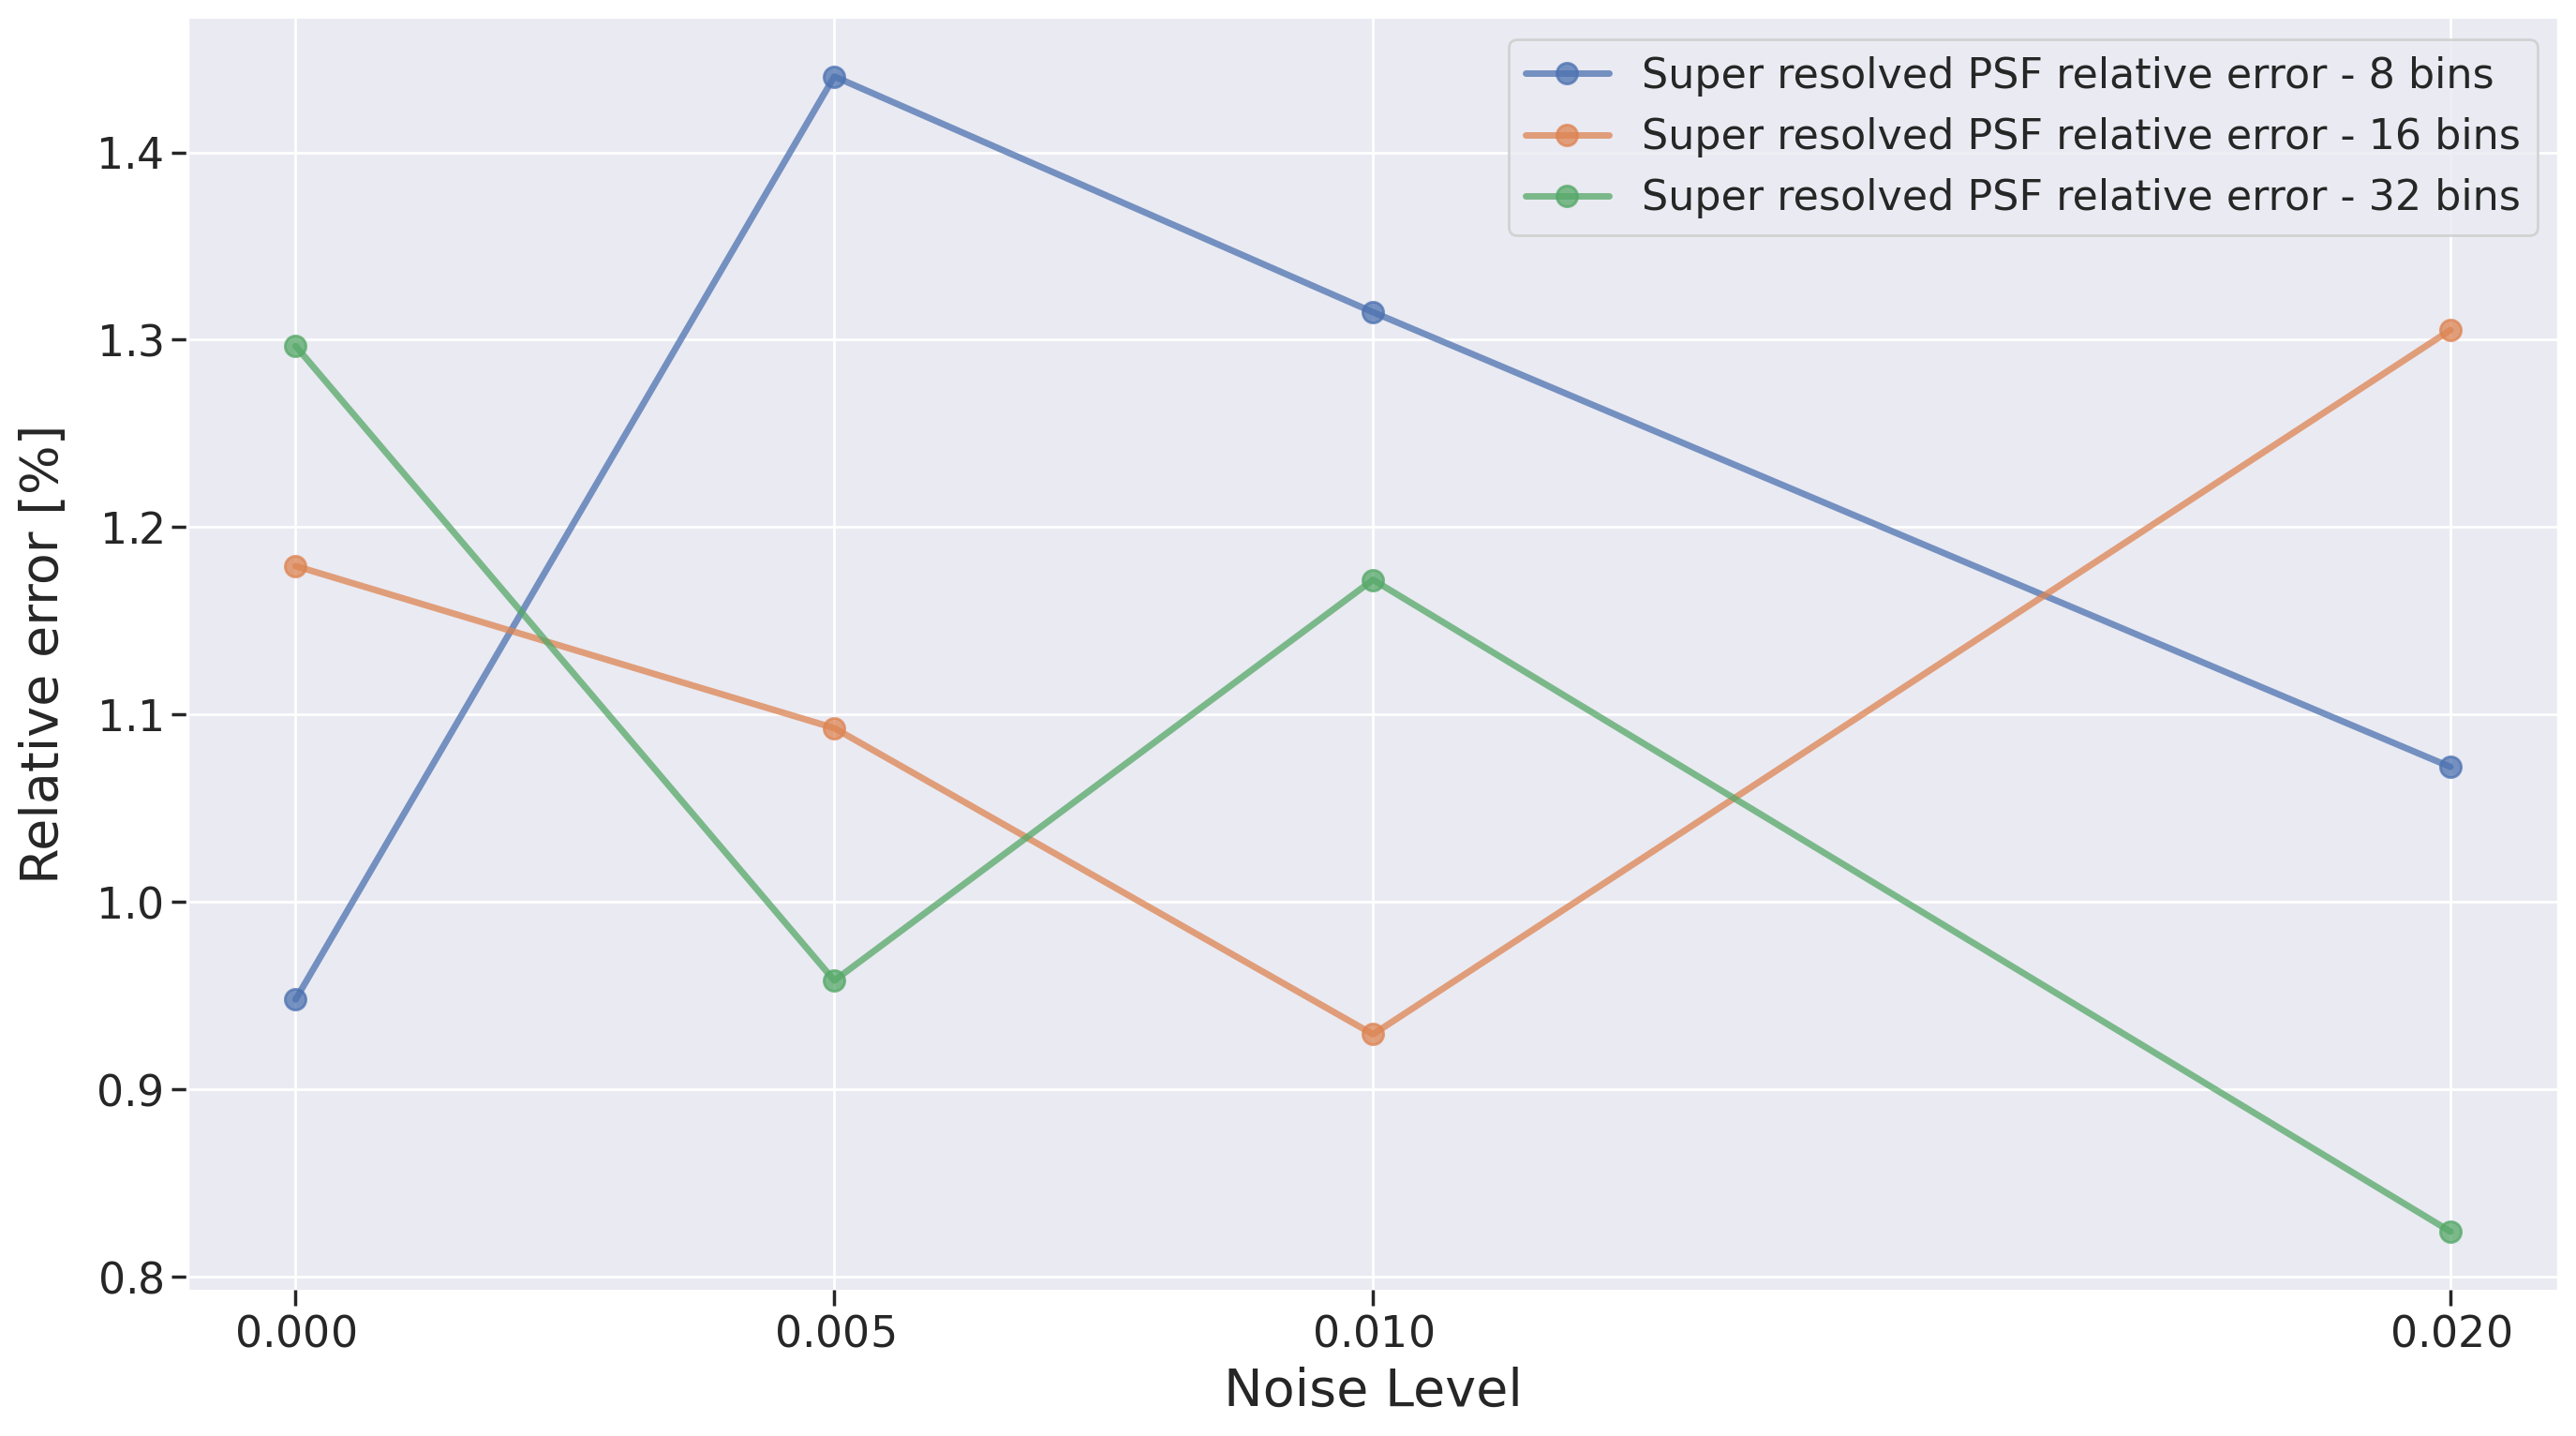

In [29]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(sigma_vals, euclid_rel_rmse8, label='Super resolved PSF relative error - 8 bins', **kwargs)
ax1.plot(sigma_vals, euclid_rel_rmse16, label='Super resolved PSF relative error - 16 bins', **kwargs)
ax1.plot(sigma_vals, euclid_rel_rmse32, label='Super resolved PSF relative error - 32 bins', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(sigma_vals)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Noise Level', fontsize = 20)


#plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars.pdf')
plt.show()

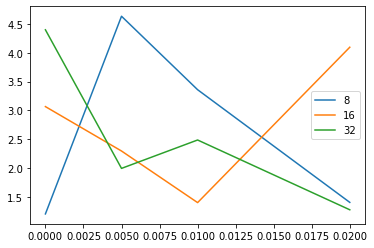

In [15]:
plt.plot(sigma_vals, pix_rel_rmse8)
plt.plot(sigma_vals, pix_rel_rmse16)
plt.plot(sigma_vals, pix_rel_rmse32)
plt.legend(['8','16','32'])

In [16]:
test_metrics = np.load('../wf-outputs/metrics/metrics-poly_interp_{}bins_sigma_{}.npy'.format(8, '0'), allow_pickle=True)[()]




In [17]:
test_metrics.keys()

dict_keys(['test_metrics', 'train_metrics'])

In [18]:
test_metrics['test_metrics'].keys()

dict_keys(['poly_metric', 'mono_metric', 'opd_metric', 'shape_results_dict'])

In [19]:
test_metrics['test_metrics']['shape_results_dict'].keys()

dict_keys(['pred_e1_HSM', 'pred_e2_HSM', 'pred_R2_HSM', 'GT_pred_e1_HSM', 'GT_ped_e2_HSM', 'GT_pred_R2_HSM', 'rmse_e1', 'std_rmse_e1', 'rel_rmse_e1', 'std_rel_rmse_e1', 'rmse_e2', 'std_rmse_e2', 'rel_rmse_e2', 'std_rel_rmse_e2', 'rmse_R2_meanR2', 'std_rmse_R2_meanR2', 'pix_rmse', 'pix_rmse_std', 'rel_pix_rmse', 'rel_pix_rmse_std', 'output_Q', 'output_dim', 'n_bins_lda'])

In [23]:
test_metrics = np.load('../wf-outputs/metrics/metrics-poly_interp_{}bins_sigma_{}.npy'.format(8, '02'), allow_pickle=True)[()]

test_metrics['test_metrics']['shape_results_dict']['rel_pix_rmse']

1.4044273644685745